<a href="https://colab.research.google.com/github/ylfoo/ECE3066/blob/main/Classify_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unfinished debugging!  
## AIS1:	Familiarization with the development toolset for machine learning systems

### Objectives

To analyse the general workflow of a machine learning system.
To develop a machine learning system for classification using Python with Scikit-Learn package.

### Steps of Developing a Classification System

1. Open Jupyter Notebook and create a new notebook (named it as AIS1).
2. Enter the following codes in the new notebook.

#Classification: Iris flowers prediction

First, load the libraries.

In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

Then load the dataset

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

Summarize the data

In [4]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target variable to the dataframe
df['target'] = dataset.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Print any 5 rows
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
135,7.7,3.0,6.1,2.3,2
66,5.6,3.0,4.5,1.5,1
89,5.5,2.5,4.0,1.3,1
71,6.1,2.8,4.0,1.3,1
7,5.0,3.4,1.5,0.2,0


In [7]:
df.shape

(150, 5)

In [8]:
# Data description
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# View the class distribution
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

Data visualizations

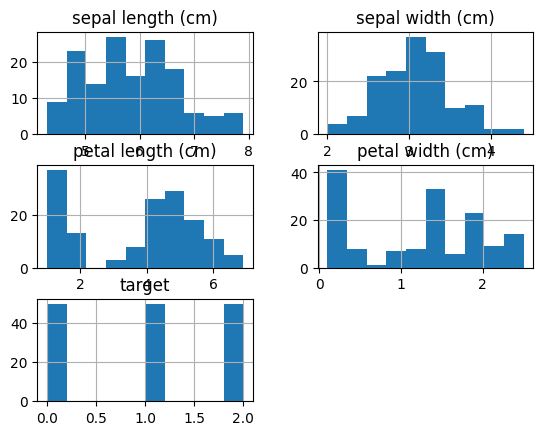

In [19]:
# histograms
df.hist()
pyplot.show()

Prepare the data for training & testing

In [ ]:
# Split-out train and test sets
array = dataset.values
X = array[:,0:4]
y = array[:,4]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

3. Use the given dataset, iris.data.csv
4. Check the dimensions of train set (X_train) and test set (X_test). How many data samples are there in the train set and test set?
5. Use k-nearest neighbor (kNN) classifier to perform the classification of the iris flowers.
6. Try with different values of k to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
7. Next, use support vector machine (SVM) classifier to perform the classification.
8. Try with different types of kernel (linear or rbf) and values of  C (0.001, 0.01, 0.1, 1, 10) to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
9. Finally, use decision tree classifier to perform the classification.
10. Try with different values for max_depth (None, 2, 4, 8, 10) to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
11. You are required to submit a lab report to discuss all the observations and results obtained in this experiment (use tables to report the results).

In [ ]:
print(X_train.shape, X_test.shape)

Use k Nearest Neighbors method

In [ ]:
knn = KNC().fit(X_train, y_train)

In [ ]:
print(knn.score(X_test, y_test)) # Warning should be gone after updating the sklearn

Find the best kNN parameters

In [ ]:
print('k-Nearest Neighbours (kNN) Classification')
n_neighbors = list(range(1,11))
knn = KNC().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, hyperparameters, cv=12)
grid.fit(X, y)
print('Best kNN Parameters:')
print(grid.best_params_)

In [ ]:
print('k-Nearest Neighbours (kNN) using the best parameters:')
knn2 = KNC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {knn2.score(X_test, y_test)}')
print(f'Training Accuracy: {knn2.score(X_train, y_train)}')
y_pred_knn2 = knn2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_knn2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
# plt.show()

Now let's try with Support Vector Machine (SVM). Let's start with a linear kernel.

Find the best SVM parameters

In [ ]:
print('Support Vector Machine (SVM)')
svc = SVC().fit(X_train, y_train)
params = dict(kernel= ['rbf','linear'], C=[0.001, 0.01, 0.1, 1, 10], gamma=[0.001, 0.01, 0.1, 1, 10])
grid = GridSearchCV(svc, params, n_jobs=-1, verbose=2)
grid.fit(X, y)
print('Best SVM Parameters:')
print(grid.best_params_)

In [ ]:
print('Support Vector Machine (SVM) using the best parameters:')
svc2 = SVC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {svc2.score(X_test, y_test)}')
print(f'Training Accuracy: {svc2.score(X_train, y_train)}')
y_pred_svc2 = svc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred_svc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_svc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='magma')
# plt.show()

Now let's try with Decision Tree.

Find the best Decision Tree parameters

In [ ]:
print('Decision Tree')
max_depth = list(range(1,11))
dtc = DTC().fit(X_train, y_train)
hyperparameters = dict(max_depth=max_depth)
grid = GridSearchCV(dtc, hyperparameters, cv=12)
grid.fit(X, y)
print('Best Decision Tree Parameters: ')
print(grid.best_params_)

In [ ]:
print('Decision Tree using best parameters')
dtc2 = DTC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {dtc2.score(X_test, y_test)}')
print(f'Training Accuracy: {dtc2.score(X_train, y_train)}')
y_pred_dtc2 = dtc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_dtc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_dtc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='plasma')
# plt.show()

Show the tree

In [ ]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
tree.plot_tree(dtc,
               feature_names = features,
               class_names = class_label,
               filled = True);